Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [19]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import importlib
importlib.reload(site)
importlib.reload(honey)

<module 'honeycomb_plot' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/honeycomb_plot.py'>

In [20]:
Npx = 2 # Number of plaquette in each dimension
Npy = 1
model = site.SitesOBC(Npx, Npy)

In [21]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print(model.Nxsites_1)
print(model.Nxsites_2)
print(model.Nyrows)
print(model.partition)

Number of sites: 10
array of ordered sites:  [0 1 2 3 4 5 6 7 8 9]
5
6
2
['A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B']


In [22]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]]


In [23]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [0 1 2 3 4 5 6 7 8 9]
(0, 1)


In [24]:
9 % 2

1

In [25]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bonds = model.get_diagonalbonds()

In [26]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bonds: ", np.array(diagonal_bonds))


xx_bond:  [[0 1]
 [2 3]
 [6 7]
 [8 9]]
yy_bond:  [[2 1]
 [4 3]
 [6 5]
 [8 7]]
zz_bond:  [[0 5]
 [2 7]
 [4 9]]
diagonal_bonds:  [[0 7]
 [2 9]]


In [27]:
lllist = [3,4,5]
for i, id in enumerate(lllist):
    print(i, id)

0 3
1 4
2 5


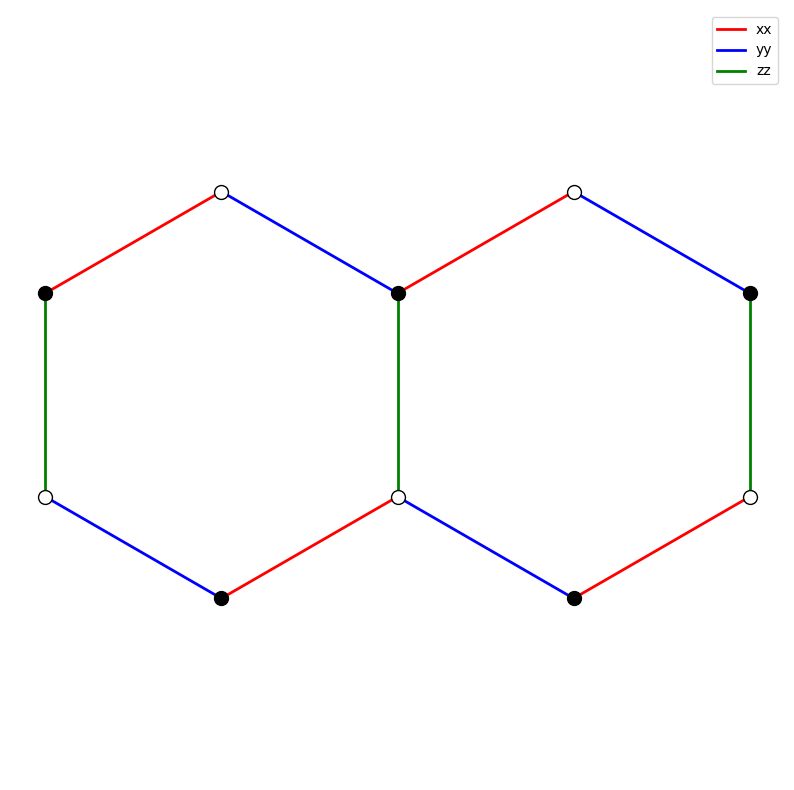

In [28]:
modell = site.SitesOBC(Npx = 2, Npy = 1)
# indices = [14,16,27,28,29,30,41,43]
indices = [25,27,38,39,40,41,52,54]
# honey.plot_honeycomb(modell, plot_anyon_bonds = True, plot_diagonal_bonds=False, sites = indices, plaquette_site = 40)
honey.plot_honeycomb(modell, plot_anyon_bonds = False, plot_diagonal_bonds=False, fig_size=(10,10))


In [29]:
coords = model.get_coordinates()
print("Coordinates of sites: ", coords)

Coordinates of sites:  [[ 0.         -0.        ]
 [ 0.8660254   0.5       ]
 [ 1.73205081 -0.        ]
 [ 2.59807621  0.5       ]
 [ 3.46410162 -0.        ]
 [ 0.         -1.        ]
 [ 0.8660254  -1.5       ]
 [ 1.73205081 -1.        ]
 [ 2.59807621 -1.5       ]
 [ 3.46410162 -1.        ]]


### Fermionic representation of many wonderful things

In [52]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

In [53]:
model = site.SitesOBC(Npx=5, Npy=5)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

70


In [54]:
dfx = pd.DataFrame(fgs.h0_x)
dfy = pd.DataFrame(fgs.h0_y)
dfz = pd.DataFrame(fgs.h0_z)

print("Hamiltonian h0_x:\n", dfx.round(2))
print("Hamiltonian h0_y:\n", dfy.round(2))
print("Hamiltonian h0_z:\n", dfz.round(2))

Hamiltonian h0_x:
           0         1         2         3         4         5         6   \
0   0.0+0.0j  0.5+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1  -0.5-0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.5+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3   0.0+0.0j  0.0+0.0j -0.5-0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4   0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.5+0.0j  0.0+0.0j   
..       ...       ...       ...       ...       ...       ...       ...   
65  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
66  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
67  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
68  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
69  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   

          7         8         9   ...        60        61        62 

# Topological Order Parameter

In [55]:
# indices = [14,16,27,28,29,30,41,43]
indices = [25,27,38,39,40,41,52,54]

# loop = [1 if i in indices else 0 for i in range(model.Nsites)]
loop = np.zeros(model.Nsites)
loop[indices] = 1  # sets all specified indices to 1

print(loop)

print(fgs.expectation_val_Majorana_string(loop))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(np.complex128(-1+0j), np.complex128(-1+0j))


## Majorana notation
R = e^(4h)

In [60]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

T = 0.65
# t = T*np.pi/4.
Rex, Rey, Rez, Re = f.floquet_operator(fgs.he_x, fgs.he_y, fgs.he_z, T)
R0x, R0y, R0z, R0 = f.floquet_operator(fgs.h0_x, fgs.h0_y, fgs.h0_z, T)

N = 10
exp_value = []
for i in range(N):
    n = fgs.order_parameter(loop)
    exp_value.append(n)
    print(n)
    fgs.update_cov_0_matrix(R0)
    fgs.update_cov_e_matrix(Re)


n = fgs.order_parameter(loop)
exp_value.append(n)
print(n)

(1-0j)
(-0.9728845349082528-0j)
(-0.34914430055297213-0j)
(-0.0903799468754241-0j)
(-0.12886837746871516-0j)
(0.09519640027558524-0j)
(-0.3281928767281354-0j)
(0.36041109790094017-0j)
(-4.565653224590403-0j)
(2.9723317471829063-0j)
(-0.1542181345708183-0j)


## Dirac notation
(wrong for now)

In [ ]:
# t = np.pi/12
# fgs.update_corr_matrix(He_x,t)
# fgs.update_corr_matrix(He_y,t)
# fgs.update_corr_matrix(He_z,t)

# fgs.Cov = fgs.corr_to_cov()

# print(fgs.expectation_val_Majorana_string(loop))


Text(0.5, 1.0, 'Measurement of Loop operator O under Floquet drive')

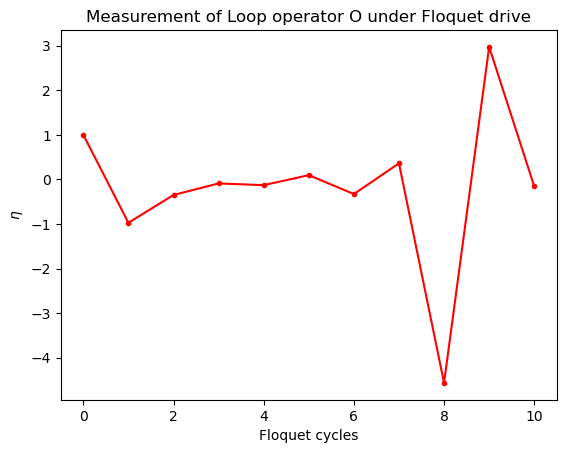

In [61]:
plt.plot(range(N+1), exp_value, '.-', color='red')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title("Measurement of Loop operator O under Floquet drive")